# Пишем функцию которая считает расстояние между точками A и B разными методами

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
nyc = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-bakaev/Lesson_8/nyc.csv.zip', compression="zip")

In [3]:
nyc.head()

key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3                1  
4                1

In [4]:
def haversine(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, radius=6371):
    a = np.sin(((np.radians(dropoff_latitude) - np.radians(pickup_latitude)) / 2))**2
    b = np.cos(np.radians(pickup_latitude))*np.cos(np.radians(dropoff_latitude))
    c = np.sin(((np.radians(dropoff_longitude) - np.radians(pickup_longitude)) / 2))**2
    d = a+(b*c)
    return (2*radius)*np.arcsin(np.sqrt(d))
    


# Посчитаем методом .iterrows()

In [5]:
%%time
dists = []
for i, row in nyc.iterrows():
    dists.append(haversine(row['pickup_longitude'],row['pickup_latitude'],row['dropoff_longitude'],row['dropoff_latitude']))
nyc['distance'] = dists

CPU times: user 6.55 s, sys: 22.6 ms, total: 6.57 s
Wall time: 6.57 s


In [6]:
nyc.head()

key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  distance  
0                1  1.030764  
1                1  8.450134  
2                2  1.389525  
3                1  2.799270  
4                1  1.999157

# Посчитаем методом .itertuples()

In [7]:
%%time
dists2 = []
for row in nyc.itertuples():
    dists2.append(haversine(row.pickup_longitude ,row.pickup_latitude ,row.dropoff_longitude, row.dropoff_latitude))
nyc['distance'] = dists2


CPU times: user 935 ms, sys: 6.6 ms, total: 942 ms
Wall time: 940 ms


In [8]:
nyc.head()

key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  distance  
0                1  1.030764  
1                1  8.450134  
2                2  1.389525  
3                1  2.799270  
4                1  1.999157

# Применяем lambda haversine

In [9]:
%%time
nyc['distance'] = nyc[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)

CPU times: user 1.82 s, sys: 43.3 ms, total: 1.86 s
Wall time: 1.86 s


In [10]:
longest = nyc['distance'].max()

In [11]:
nyc[nyc['distance'] == nyc['distance'].max()]

key  fare_amount          pickup_datetime  \
48996  2012-05-12 10:48:00.00000020         49.8  2012-05-12 10:48:00 UTC   

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
48996        -74.014917        40.713382                0.0               0.0   

       passenger_count     distance  
48996                1  8667.818812

# Применяем векторизацию

In [12]:
%%time
nyc['distance'] = haversine(nyc['pickup_longitude'], nyc['pickup_latitude'], nyc['dropoff_longitude'], nyc['dropoff_latitude'])

CPU times: user 16.3 ms, sys: 4.03 ms, total: 20.3 ms
Wall time: 17.1 ms


# Применяем веторизацию с указанием .values 

In [13]:
%%time
nyc['distance'] = haversine(nyc['pickup_longitude'].values, nyc['pickup_latitude'].values, nyc['dropoff_longitude'].values, nyc['dropoff_latitude'].values)

CPU times: user 12.1 ms, sys: 431 µs, total: 12.5 ms
Wall time: 10.4 ms


# Ищем ошибочные строки с нулевым значениями конечных точек

In [14]:
nyc.query('(dropoff_longitude == 0) or (dropoff_latitude == 0)').shape

(958, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dabff3cf8>,
      dtype=object)

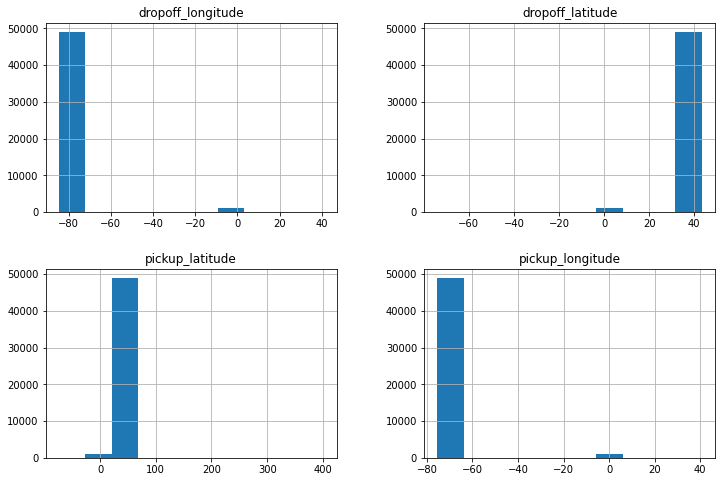

In [15]:
nyc[['dropoff_longitude','dropoff_latitude','pickup_latitude','pickup_longitude']].hist(figsize=(12,8))

In [18]:
nyc_small = nyc.query('(10 < pickup_latitude < 120) and (pickup_longitude < -60) and (10 < dropoff_latitude) and (dropoff_longitude < -60) and (distance <= 50)') 

In [19]:
nyc_small.loc[nyc_small.distance.idxmax()].fare_amount

136.0